<h1 style="color:#ff355e; font-family:Ewert; font-size:150%;" class="font-effect-3d">Code Library, Style, & Links</h1>

In [1]:
%%html
<style>
@import url('https://fonts.googleapis.com/css?family=Ewert|Roboto&effect=3d');
span {font-family:'Roboto'; color:black; text-shadow:4px 4px 4px slategray;}  
div.output_area pre{font-family:'Roboto'; font-size:110%; color:#ff355e;}      
</style>

In [2]:
import numpy as np,pandas as pd
import os,h5py,warnings
import tensorflow as tf,pylab as pl
from tensorflow.keras import layers as tkl
from sklearn.metrics import confusion_matrix,\
classification_report
from IPython.core.magic import register_line_magic
warnings.filterwarnings('ignore')
pl.style.use('seaborn-whitegrid')
style_dict={'background-color':'silver','color':'#ff355e', 
            'border-color':'white','font-family':'Roboto'}
fpath='../input/quick-draw-images-from-key-points/'
fpath2='../input/quick-draw-images-from-key-points-2/'
fpath3='../input/quick-draw-images-from-key-points-3/'
fpath4='../input/quick-draw-images-from-key-points-4/'
fpath5='../input/quick-draw-images-from-key-points-5/'
fpath6='../input/quick-draw-images-from-key-points-6/'
fpath7='../input/quick-draw-images-from-key-points-7/'
files=sorted(os.listdir(fpath))
files2=sorted(os.listdir(fpath2))
files3=sorted(os.listdir(fpath3))
files4=sorted(os.listdir(fpath4))
files5=sorted(os.listdir(fpath5))
files6=sorted(os.listdir(fpath6))
files7=sorted(os.listdir(fpath7))
files2=files2[1:]+[files2[0]]
[files,files2,files3,files4,files5,files6,files7]

[['QuickDrawImages1.h5',
  'QuickDrawImages2.h5',
  'QuickDrawImages3.h5',
  'QuickDrawImages4.h5',
  'QuickDrawImages5.h5'],
 ['QuickDrawImages6.h5',
  'QuickDrawImages7.h5',
  'QuickDrawImages8.h5',
  'QuickDrawImages9.h5',
  'QuickDrawImages10.h5'],
 ['QuickDrawImages11.h5',
  'QuickDrawImages12.h5',
  'QuickDrawImages13.h5',
  'QuickDrawImages14.h5',
  'QuickDrawImages15.h5'],
 ['QuickDrawImages16.h5',
  'QuickDrawImages17.h5',
  'QuickDrawImages18.h5',
  'QuickDrawImages19.h5',
  'QuickDrawImages20.h5'],
 ['QuickDrawImages21.h5',
  'QuickDrawImages22.h5',
  'QuickDrawImages23.h5',
  'QuickDrawImages24.h5',
  'QuickDrawImages25.h5'],
 ['QuickDrawImages26.h5',
  'QuickDrawImages27.h5',
  'QuickDrawImages28.h5',
  'QuickDrawImages29.h5',
  'QuickDrawImages30.h5'],
 ['QuickDrawImages31.h5',
  'QuickDrawImages32.h5',
  'QuickDrawImages33.h5',
  'QuickDrawImages34.h5']]

<h1 style="color:#ff355e; font-family:Ewert; font-size:150%;" class="font-effect-3d">Data Construction</h1>

In [3]:
labels=os.listdir('../input/quickdraw-doodle-recognition/'+\
                  'train_simplified/')
labels=np.array(sorted([l[:-4] for l in labels]))

In [4]:
D=500; x=[]; y=[]
@register_line_magic
def load_img(n):
    global D,x,y
    if n=='1': fp=fpath; fns=files; m=5
    if n=='2': fp=fpath2; fns=files2; m=5
    if n=='3': fp=fpath3; fns=files3; m=5
    if n=='4': fp=fpath4; fns=files4; m=5
    if n=='5': fp=fpath5; fns=files5; m=5
    if n=='6': fp=fpath6; fns=files6; m=5
    if n=='7': fp=fpath7; fns=files7; m=4
    for i in range(m):
        f=h5py.File(fp+fns[i],'r')
        keys=list(f.keys())
        x+=[f[keys[0]][i*10000:i*10000+D] 
            for i in range(10)]
        y+=[f[keys[1]][i*10000:i*10000+D]
            for i in range(10)]

In [5]:
%load_img 1
%load_img 2
%load_img 3
%load_img 4
%load_img 5
%load_img 6
%load_img 7

In [6]:
x=np.array(x)
num_classes=x.shape[0]
x=x.reshape(num_classes*D,96,96)
y=np.array(y).reshape(num_classes*D)
N=y.shape[0]; n=int(.1*N)
shuffle_ids=np.arange(N)
np.random.RandomState(12).shuffle(shuffle_ids)
x,y=x[shuffle_ids],y[shuffle_ids]
x.shape,y.shape

((170000, 96, 96), (170000,))

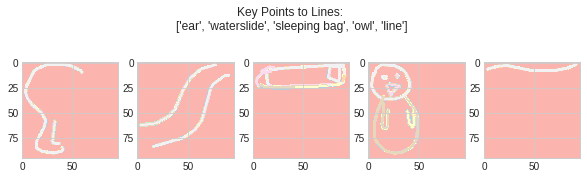

In [7]:
nn=np.random.randint(0,N,5)
ll=[labels[y[nn[i]]] for i in range(5)]
pl.figure(figsize=(10,3))
for i in range(5):
    pl.subplot(1,5,i+1)
    pl.imshow(x[nn[i]],cmap='Pastel1')
pl.suptitle('Key Points to Lines: \n%s'%ll);

In [8]:
x=x.reshape(-1,96,96,1)
x_test,x_valid,x_train=x[:n],x[n:2*n],x[2*n:]
y_test,y_valid,y_train=y[:n],y[n:2*n],y[2*n:]
del x,y,shuffle_ids

<h1 style="color:#ff355e; font-family:Ewert; font-size:150%;" class="font-effect-3d">Simple Models for Many Labels</h1>

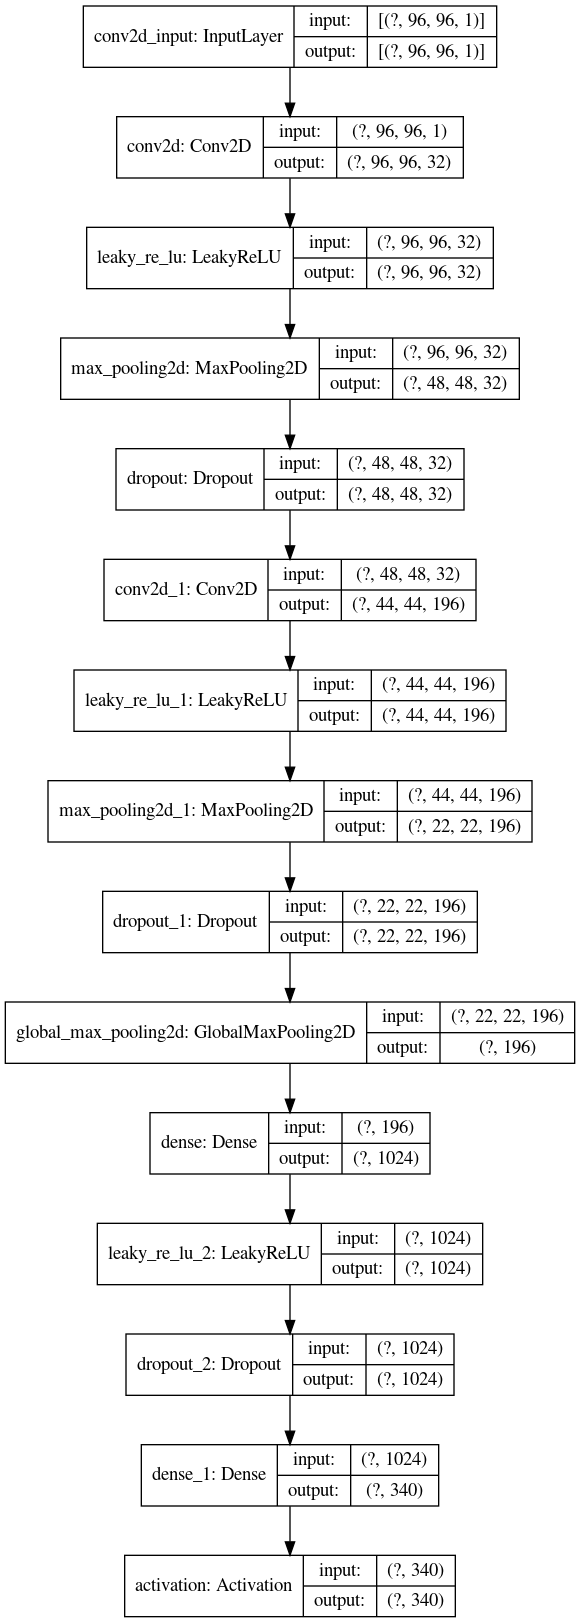

In [9]:
def model():
    model=tf.keras.Sequential()    
    model.add(tkl.Conv2D(32,(5,5),padding='same',
                         input_shape=x_train.shape[1:]))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.2))
    model.add(tkl.Conv2D(196,(5,5)))
    model.add(tkl.LeakyReLU(alpha=.02))    
    model.add(tkl.MaxPooling2D(pool_size=(2,2)))
    model.add(tkl.Dropout(.2))
    model.add(tkl.GlobalMaxPooling2D())   
    model.add(tkl.Dense(1024))
    model.add(tkl.LeakyReLU(alpha=.02))
    model.add(tkl.Dropout(.5))     
    model.add(tkl.Dense(num_classes))
    model.add(tkl.Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam', 
                  metrics=['accuracy'])
    return model
model=model()
tf.keras.utils.plot_model(model,show_shapes=True)

In [10]:
fw='weights.best.cv001-%s'%num_classes+'.hdf5'
checkpointer=tf.keras.callbacks.\
ModelCheckpoint(filepath=fw,verbose=2,
                save_best_only=True)
lr_reduction=tf.keras.callbacks.\
ReduceLROnPlateau(monitor='val_loss',
                  patience=5,verbose=2,factor=.75)
history=model.fit(x_train,y_train,epochs=100,
                  batch_size=512,verbose=2,
                  validation_data=(x_valid,y_valid),
                  callbacks=[checkpointer,lr_reduction])

Epoch 1/100

Epoch 00001: val_loss improved from inf to 4.84273, saving model to weights.best.cv001-340.hdf5
266/266 - 42s - loss: 5.9500 - accuracy: 0.0263 - val_loss: 4.8427 - val_accuracy: 0.0727 - lr: 0.0010
Epoch 2/100

Epoch 00002: val_loss improved from 4.84273 to 4.24335, saving model to weights.best.cv001-340.hdf5
266/266 - 42s - loss: 4.4768 - accuracy: 0.0960 - val_loss: 4.2434 - val_accuracy: 0.1415 - lr: 0.0010
Epoch 3/100

Epoch 00003: val_loss improved from 4.24335 to 3.95642, saving model to weights.best.cv001-340.hdf5
266/266 - 42s - loss: 4.0458 - accuracy: 0.1535 - val_loss: 3.9564 - val_accuracy: 0.1855 - lr: 0.0010
Epoch 4/100

Epoch 00004: val_loss improved from 3.95642 to 3.69170, saving model to weights.best.cv001-340.hdf5
266/266 - 41s - loss: 3.7814 - accuracy: 0.1929 - val_loss: 3.6917 - val_accuracy: 0.2312 - lr: 0.0010
Epoch 5/100

Epoch 00005: val_loss improved from 3.69170 to 3.52703, saving model to weights.best.cv001-340.hdf5
266/266 - 42s - loss: 3.598

In [11]:
model.load_weights(fw)
model.evaluate(x_test,y_test)

532/532 [==============================] - 3s 6ms/step - loss: 2.2909 - accuracy: 0.4691


[2.2909352779388428, 0.4691176414489746]

In [12]:
py_test=model.predict(x_test)
py_test=[np.argmax(x) for x in py_test]
print(classification_report(y_test,py_test))

              precision    recall  f1-score   support

           0       0.93      0.60      0.73        65
           1       0.30      0.32      0.31        44
           2       0.39      0.46      0.42        48
           3       0.55      0.67      0.61        64
           4       0.51      0.53      0.52        55
           5       0.38      0.38      0.38        50
           6       0.30      0.44      0.36        52
           7       0.42      0.57      0.49        49
           8       0.43      0.52      0.47        50
           9       0.43      0.45      0.44        44
          10       0.84      0.73      0.78        49
          11       0.53      0.33      0.40        61
          12       0.29      0.42      0.34        48
          13       0.44      0.48      0.46        50
          14       0.40      0.41      0.41        51
          15       0.49      0.49      0.49        57
          16       0.62      0.55      0.58        51
          17       0.49    

In [13]:
pd.DataFrame(confusion_matrix(y_test,py_test))\
.head(20).T.style.set_properties(**style_dict)